In [1]:
from scipy import signal, fft
import numpy as np
import matplotlib.pyplot as plt

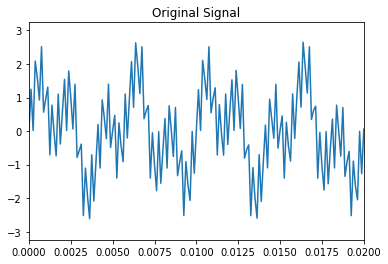

In [2]:
t= np.linspace(0,1,8000)
f1,f2,f3 = 200,500,3000
sig = np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+np.sin(2*np.pi*f3*t)
plt.plot(t,sig)
plt.title('Original Signal')
plt.xlim(0,0.02)
plt.show()

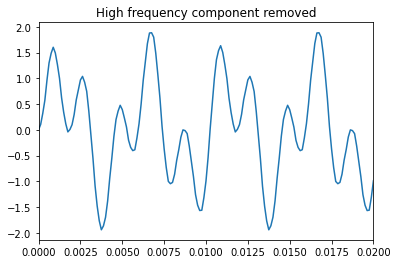

In [3]:
f1,f2 = 800,2000
N, Wn = signal.buttord(f1/len(t), f2/len(t), 1.938, 13.979,analog=True)
b,a = np.array([0.0842,0.0842*2,0.0842]),np.array([1,-1.0281,0.3652])##signal.butter(1,Wn,'lowpass',analog=True)#
out = signal.lfilter(b, a, sig)
plt.plot(t,out)
plt.title('High frequency component removed')
plt.xlim(0,0.02)
plt.show()

/usr/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


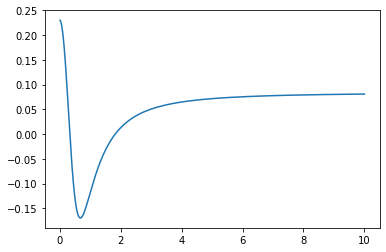

In [4]:
response = signal.freqs(b,a)
plt.plot(response[0],response[1])
plt.show()

/tmp/ipykernel_20643/3839656491.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('../fft_trials/Sample1.wav')


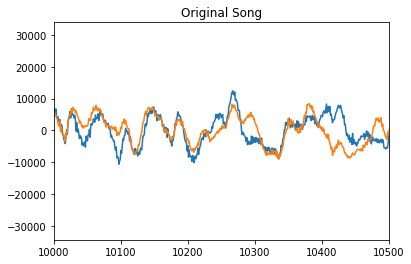

In [5]:
from scipy.io import wavfile
from scipy import fft
samplerate, data = wavfile.read('../fft_trials/Sample1.wav')
data = data.T
t = np.arange(len(data[0]))
plt.plot(t,data[0])
plt.plot(t,data[1])
plt.title('Original Song')
plt.xlim([10000,10500])
plt.show()

/tmp/ipykernel_20643/2334923296.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.arange(512),np.abs(data_fft[0])[0][512:],'b-')
/tmp/ipykernel_20643/2334923296.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.arange(512),np.abs(data_fft[1])[0][512:],'r-')


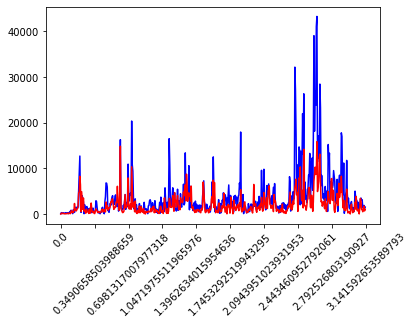

In [6]:
data_fft = [[],[]]
for i in range(0,len(data[0]),1024):
    data_fft[0].append(fft.fft(data[0][i:i+1024]))
plt.plot(np.arange(512),np.abs(data_fft[0])[0][512:],'b-')
for j in range(0,len(data[1]),1024):
    data_fft[1].append(fft.fft(data[1][j:j+1024]))
plt.plot(np.arange(512),np.abs(data_fft[1])[0][512:],'r-')
plt.xticks(np.linspace(0,512,10),labels=np.linspace(0,np.pi,10),rotation=45)
plt.show()



In [7]:
Fs = 8000
#Wp, Ws = 1300,2000
Wp, Ws = 400,800
N, Wn = signal.cheb1ord(Wp/Fs,Ws/Fs,1,20)
print("Order of the Filter = ",N)
print("Cut-off freq = ",Wn)

Order of the Filter =  3
Cut-off freq =  0.05


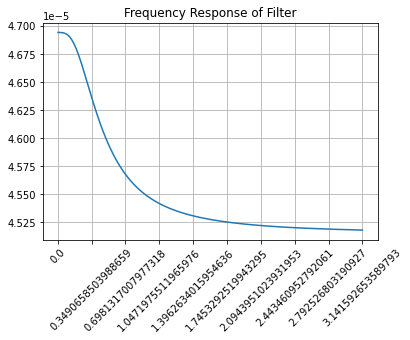

In [8]:
b, a = signal.cheby1(N,9,Wn,btype='low')
w, h = signal.freqs(b,a)
plt.plot(w,np.abs(h))
plt.xticks(np.linspace(0,10,10),np.linspace(0,np.pi,10),rotation=45)
plt.grid(True)
plt.title("Frequency Response of Filter")
plt.show()

In [9]:
filtered_song = [signal.lfilter(b,a,data[0]),signal.lfilter(b,a,data[1])]

/tmp/ipykernel_20643/2789490735.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.arange(512),np.abs(filtered_fft[0])[0][512:],'b-')
/tmp/ipykernel_20643/2789490735.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.arange(512),np.abs(filtered_fft[1])[0][512:],'r-')


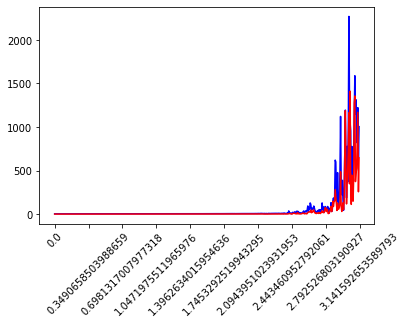

In [10]:
filtered_fft = [[],[]]
for i in range(0,len(filtered_song[0]),1024):
    filtered_fft[0].append(fft.fft(filtered_song[0][i:i+1024]))
plt.plot(np.arange(512),np.abs(filtered_fft[0])[0][512:],'b-')
for j in range(0,len(filtered_song[1]),1024):
    filtered_fft[1].append(fft.fft(filtered_song[1][j:j+1024]))
plt.plot(np.arange(512),np.abs(filtered_fft[1])[0][512:],'r-')
plt.xticks(np.linspace(0,512,10),labels=np.linspace(0,np.pi,10),rotation=45)
plt.show()


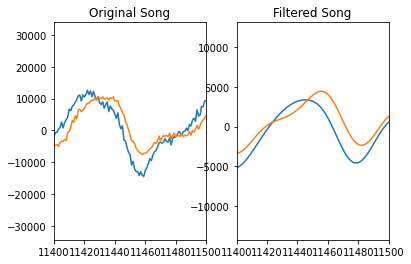

In [11]:
plt.subplot(1,2,1)
plt.plot(t,data[0])
plt.plot(t,data[1])
plt.xlim(11400,11500)
plt.title("Original Song")
plt.subplot(1,2,2)
plt.plot(t,filtered_song[0])
plt.plot(t,filtered_song[1])
plt.xlim(11400,11500)
plt.title("Filtered Song")
plt.show()

In [12]:
filtered_song = np.array(filtered_song).T

In [13]:
wavfile.write('filteredSong.wav',8000,filtered_song)

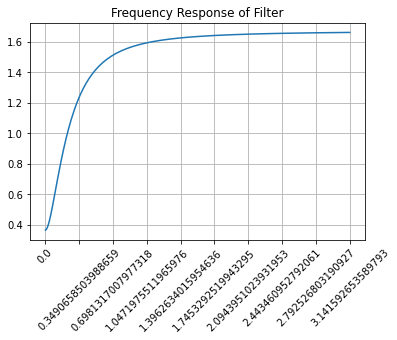

In [19]:
b, a = signal.cheby1(N,9,Wn,btype='high')
w, h = signal.freqs(a,b)
plt.plot(w,np.abs(h))
plt.xticks(np.linspace(0,10,10),np.linspace(0,np.pi,10),rotation=45)
plt.grid(True)
plt.title("Frequency Response of Filter")
plt.show()

In [15]:
filtered_song = [signal.lfilter(b,a,data[0]),signal.lfilter(b,a,data[1])]

/tmp/ipykernel_20643/2789490735.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.arange(512),np.abs(filtered_fft[0])[0][512:],'b-')
/tmp/ipykernel_20643/2789490735.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.arange(512),np.abs(filtered_fft[1])[0][512:],'r-')


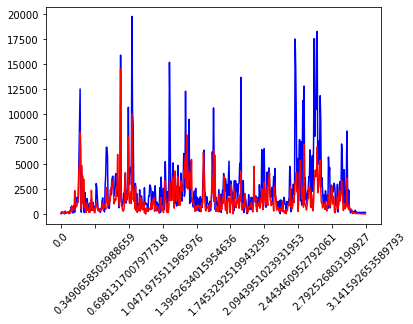

In [16]:
filtered_fft = [[],[]]
for i in range(0,len(filtered_song[0]),1024):
    filtered_fft[0].append(fft.fft(filtered_song[0][i:i+1024]))
plt.plot(np.arange(512),np.abs(filtered_fft[0])[0][512:],'b-')
for j in range(0,len(filtered_song[1]),1024):
    filtered_fft[1].append(fft.fft(filtered_song[1][j:j+1024]))
plt.plot(np.arange(512),np.abs(filtered_fft[1])[0][512:],'r-')
plt.xticks(np.linspace(0,512,10),labels=np.linspace(0,np.pi,10),rotation=45)
plt.show()


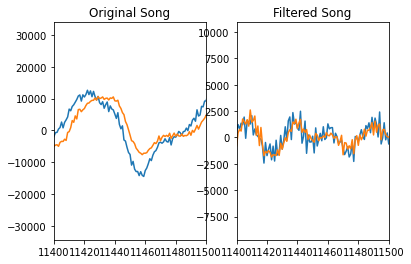

In [17]:
plt.subplot(1,2,1)
plt.plot(t,data[0])
plt.plot(t,data[1])
plt.xlim(11400,11500)
plt.title("Original Song")
plt.subplot(1,2,2)
plt.plot(t,filtered_song[0])
plt.plot(t,filtered_song[1])
plt.xlim(11400,11500)
plt.title("Filtered Song")
plt.show()

In [18]:
filtered_song = np.array(filtered_song).T
wavfile.write('filteredSongHigh.wav',8000,filtered_song)

### Recombining Audio

In [22]:
sample_rate,low_f = wavfile.read('filteredSong.wav')
sample_rate,high_f = wavfile.read('filteredSongHigh.wav')
print("Sampling frequency = ",sample_rate)

Sampling frequency =  8000


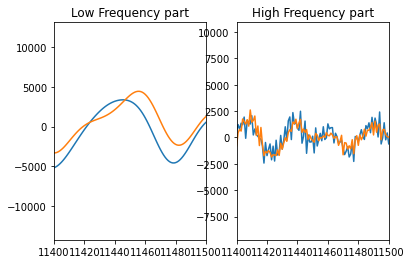

In [23]:
plt.subplot(1,2,1)
plt.plot(t,low_f)
plt.xlim(11400,11500)
plt.title("Low Frequency part")
plt.subplot(1,2,2)
plt.plot(t,high_f)
plt.xlim(11400,11500)
plt.title("High Frequency part")
plt.show()

In [24]:
mixed_song = low_f+high_f

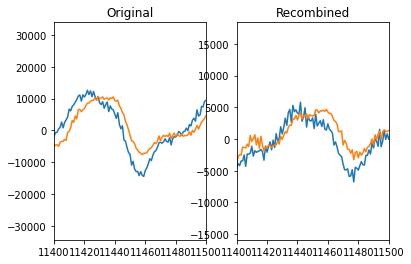

In [29]:
plt.subplot(1,2,1)
plt.plot(t,data[0])
plt.plot(t,data[1])
plt.xlim(11400,11500)
plt.title("Original")
plt.subplot(1,2,2)
plt.plot(t,mixed_song)
plt.xlim(11400,11500)
plt.title("Recombined")
plt.show()

In [26]:
wavfile.write('Recombined_song.wav',8000,mixed_song)

Increasing amplitude

In [36]:
mixed_song = 1.5*low_f+0.8*high_f

In [37]:
wavfile.write('Recombined_song_loud.wav',8000,mixed_song)